In [3]:
pip install pandas -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd

# Replace 'your_file.jsonl' with your JSONL file path
file_path1 = './mbpp_label.jsonl'
file_path2 = './mbpp_label_llama.jsonl'

# Read the JSONL file
df1 = pd.read_json(file_path1, lines=True)
df2 = pd.read_json(file_path2, lines=True)
merged_df_corrected = pd.merge(df1, df2, on='task_id', how='outer', suffixes=('', '_df2'))

# We now remove the duplicate columns from df2 that are already present in df1 except those starting with 'method2'
columns_to_drop = [col for col in merged_df_corrected if col.endswith('_df2') and not col.startswith('method2')]
merged_df_corrected.drop(columns=columns_to_drop, inplace=True)

# Renaming the columns to remove the '_df2' suffix from the 'method2' columns from df2
merged_df_corrected.rename(columns=lambda x: x.replace('_df2', ''), inplace=True)
merged_df_corrected.head()
df = merged_df_corrected
df.head()

,text,code,task_id,test_setup_code,test_list,challenge_test_list,method2_gpt4_output,method2_gpt3_5_output,method2_gpt4_success,method2_gpt3_5_success,method2_llama_output,method2_llama_success
0,Write a function to find the minimum cost path...,"R = 3\r\nC = 3\r\ndef min_cost(cost, m, n): \r...",1,,"[assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5,...",[],"\ndef min_cost(cost, m, n):\n dp = [[0 for ...","\ndef min_cost(cost, m, n):\n dp = [[0 for ...",True,False,"def min_cost(cost, m, n):\n # code here\n ...",False
1,Write a function to find the similar elements ...,"def similar_elements(test_tup1, test_tup2):\r\...",2,,"[assert similar_elements((3, 4, 5, 6),(5, 7, 4...",[],"\ndef similar_elements(test_tup1, test_tup2):\...","\ndef similar_elements(test_tup1, test_tup2):\...",False,False,"def similar_elements(test_tup1, test_tup2):\n ...",True
2,Write a python function to identify non-prime ...,import math\r\ndef is_not_prime(n):\r\n res...,3,,"[assert is_not_prime(2) == False, assert is_no...",[],\ndef is_not_prime(n):\n if n <= 1:\n ...,\ndef is_not_prime(n):\n if n <= 1:\n ...,True,True,def is_not_prime(n):\n if n == 2:\n ...,True
3,Write a function to find the largest integers ...,import heapq as hq\r\ndef heap_queue_largest(n...,4,,"[assert heap_queue_largest( [25, 35, 22, 85, 1...",[],"\nimport heapq\n\ndef heap_queue_largest(nums,...","\nimport heapq\n\ndef heap_queue_largest(nums,...",True,True,"def heap_queue_largest(nums,n):\n heap = []...",False
4,Write a function to find the number of ways to...,def count_ways(n): \r\n\tA = [0] * (n + 1) \r\...,5,,"[assert count_ways(2) == 3, assert count_ways(...",[],"\ndef count_ways(n):\n a, b = 1, 0\n for...",\ndef count_ways(n):\n if n % 2 != 0:\n ...,False,True,def count_ways(n):\n # Fill the first row w...,False


In [51]:
# List of columns to delete, replace these with your column names
columns_to_delete = ['code', 'task_id', 'test_setup_code', 'test_list', 'challenge_test_list', 'method2_gpt4_output', 'method2_gpt3_5_output', 'method2_llama_output']

# Delete the columns
df.drop(columns=columns_to_delete, inplace=True)

In [52]:
df.head()

,text,method2_gpt4_success,method2_gpt3_5_success,method2_llama_success
0,Write a function to find the minimum cost path...,True,False,False
1,Write a function to find the similar elements ...,False,False,True
2,Write a python function to identify non-prime ...,True,True,True
3,Write a function to find the largest integers ...,True,True,False
4,Write a function to find the number of ways to...,False,True,False


In [36]:
# Update the function to incorporate the new condition
# def determine_value_updated(row):
#     if row['method2_llama_success']:
#         return 0
#     elif row['method2_gpt3_5_success']:
#         return 1
#     elif row['method2_gpt4_success']:
#         return 2
#     elif not row['method2_gpt4_success'] and not row['method2_gpt3_5_success']:
#         return 3
#     return None  # This case should not occur based on the provided conditions

# # Apply the updated function to the DataFrame
# df['complexity'] = df.apply(determine_value_updated, axis=1)

# # Show the updated DataFrame
# df

,text,method2_gpt4_success,method2_gpt3_5_success,method2_llama_success,complexity
0,Write a function to find the minimum cost path...,True,False,False,2
1,Write a function to find the similar elements ...,False,False,True,0
2,Write a python function to identify non-prime ...,True,True,True,0
3,Write a function to find the largest integers ...,True,True,False,1
4,Write a function to find the number of ways to...,False,True,False,1
...,...,...,...,...,...
969,Write a function to find the maximum number of...,True,False,False,2
970,Write a function to concatenate the given two ...,False,False,True,0
971,Write a python function to left rotate the str...,True,True,True,0
972,Write a function to find the minimum total pat...,True,True,False,1


In [53]:
# Case of merging last two classes
def determine_value_updated(row):
    if row['method2_llama_success']:
        return 0
    elif row['method2_gpt3_5_success']:
        return 1
    else:
        return 2

# Apply the updated function to the DataFrame
df['complexity'] = df.apply(determine_value_updated, axis=1)

# Show the updated DataFrame
df

,text,method2_gpt4_success,method2_gpt3_5_success,method2_llama_success,complexity
0,Write a function to find the minimum cost path...,True,False,False,2
1,Write a function to find the similar elements ...,False,False,True,0
2,Write a python function to identify non-prime ...,True,True,True,0
3,Write a function to find the largest integers ...,True,True,False,1
4,Write a function to find the number of ways to...,False,True,False,1
...,...,...,...,...,...
969,Write a function to find the maximum number of...,True,False,False,2
970,Write a function to concatenate the given two ...,False,False,True,0
971,Write a python function to left rotate the str...,True,True,True,0
972,Write a function to find the minimum total pat...,True,True,False,1


In [54]:
columns_to_delete = ['method2_gpt4_success', 'method2_gpt3_5_success', 'method2_llama_success']

# Delete the columns
df.drop(columns=columns_to_delete, inplace=True)

In [55]:
df_train = df[:800]
df_test = df[800:]

<BarContainer object of 3 artists>

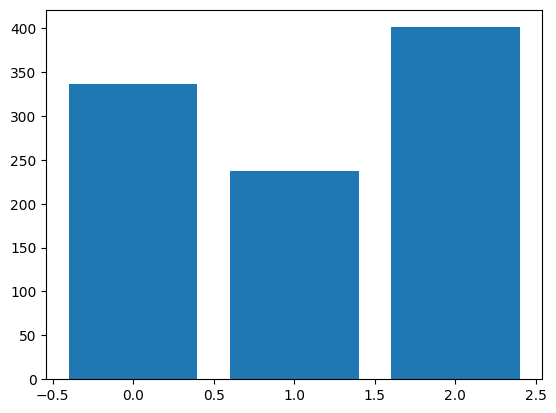

In [56]:
import matplotlib.pyplot as plt

class_counts = df['complexity'].value_counts()
plt.bar(class_counts.index, class_counts.values)

In [57]:
output_file_path_train = './mbpp_complexity_3classes_train.jsonl'
output_file_path_test = './mbpp_complexity_3classes_test.jsonl'
df_train.to_json(output_file_path_train, orient='records', lines=True)
df_test.to_json(output_file_path_test, orient='records', lines=True)

In [15]:
# For a chat model

import json

# Let's assume we read this data from 'current_dataset.jsonl'
input_file_path = './mbpp_complexity_train.jsonl'  # Replace with your actual file path
output_file_path = './mbpp_chat_train.jsonl'

# Read the JSONL file
with open(input_file_path, 'r') as file:
    current_data = [json.loads(line) for line in file]

# Define the system message that will be constant for all entries
system_message = {
    "role": "system",
    "content": "Output 0, 1, 2, or 3 based solely on the difficulty of creating the correct code for the task. "
                "Choose the least complex model that will solve the task accurately; avoid considering the time "
                "taken for solving. 0 represents a simpler task, 1 represents a slightly challenging task, 2 "
                "represents a moderately challenging task, and 3 represents a highly complex problem."
}

# Transform the current data to the desired format
transformed_data = []

for item in current_data:
    user_message = {
        "role": "user",
        "content": item["text"]
    }
    assistant_message = {
        "role": "assistant",
        "content": str(item["complexity"])
    }
    message_block = {
        "messages": [system_message, user_message, assistant_message]
    }
    transformed_data.append(message_block)

# Write the transformed data to a new JSONL file
with open(output_file_path, 'w') as outfile:
    for entry in transformed_data:
        json_record = json.dumps(entry)
        outfile.write(f"{json_record}\n")

output_file_path

'./mbpp_chat_train.jsonl'

In [16]:
# For a chat model

import json

# Let's assume we read this data from 'current_dataset.jsonl'
input_file_path = './mbpp_complexity_test.jsonl'  # Replace with your actual file path
output_file_path = './mbpp_chat_test.jsonl'

# Read the JSONL file
with open(input_file_path, 'r') as file:
    current_data = [json.loads(line) for line in file]

# Define the system message that will be constant for all entries
system_message = {
    "role": "system",
    "content": "Output 0, 1, 2, or 3 based solely on the difficulty of creating the correct code for the task. "
                "Choose the least complex model that will solve the task accurately; avoid considering the time "
                "taken for solving. 0 represents a simpler task, 1 represents a slightly challenging task, 2 "
                "represents a moderately challenging task, and 3 represents a highly complex problem."
}

# Transform the current data to the desired format
transformed_data = []

for item in current_data:
    user_message = {
        "role": "user",
        "content": item["text"]
    }
    assistant_message = {
        "role": "assistant",
        "content": str(item["complexity"])
    }
    message_block = {
        "messages": [system_message, user_message, assistant_message]
    }
    transformed_data.append(message_block)

# Write the transformed data to a new JSONL file
with open(output_file_path, 'w') as outfile:
    for entry in transformed_data:
        json_record = json.dumps(entry)
        outfile.write(f"{json_record}\n")

output_file_path

'./mbpp_chat_test.jsonl'

In [17]:
data_path = "./mbpp_chat_train.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 800
First example:
{'role': 'system', 'content': 'Output 0, 1, 2, or 3 based solely on the difficulty of creating the correct code for the task. Choose the least complex model that will solve the task accurately; avoid considering the time taken for solving. 0 represents a simpler task, 1 represents a slightly challenging task, 2 represents a moderately challenging task, and 3 represents a highly complex problem.'}
{'role': 'user', 'content': 'Write a function to find the minimum cost path to reach (m, n) from (0, 0) for the given cost matrix cost[][] and a position (m, n) in cost[][].'}
{'role': 'assistant', 'content': '2'}


In [18]:
pip install tiktoken -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install collection -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tiktoken # for token counting
import numpy as np
from collections import defaultdict
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue
        
    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
        
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call") for k in message):
            format_errors["message_unrecognized_key"] += 1
        
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
    
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


In [21]:
encoding = tiktoken.get_encoding("cl100k_base")

# not exact!
# simplified from https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3
    return num_tokens

def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

def print_distribution(values, name):
    print(f"\n#### Distribution of {name}:")
    print(f"min / max: {min(values)}, {max(values)}")
    print(f"mean / median: {np.mean(values)}, {np.median(values)}")
    print(f"p5 / p95: {np.quantile(values, 0.1)}, {np.quantile(values, 0.9)}")

In [22]:
# Warnings and tokens counts
n_missing_system = 0
n_missing_user = 0
n_messages = []
convo_lens = []
assistant_message_lens = []

for ex in dataset:
    messages = ex["messages"]
    if not any(message["role"] == "system" for message in messages):
        n_missing_system += 1
    if not any(message["role"] == "user" for message in messages):
        n_missing_user += 1
    n_messages.append(len(messages))
    convo_lens.append(num_tokens_from_messages(messages))
    assistant_message_lens.append(num_assistant_tokens_from_messages(messages))
    
print("Num examples missing system message:", n_missing_system)
print("Num examples missing user message:", n_missing_user)
print_distribution(n_messages, "num_messages_per_example")
print_distribution(convo_lens, "num_total_tokens_per_example")
print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
n_too_long = sum(l > 4096 for l in convo_lens)
print(f"\n{n_too_long} examples may be over the 4096 token limit, they will be truncated during fine-tuning")

Num examples missing system message: 0
Num examples missing user message: 0

#### Distribution of num_messages_per_example:
min / max: 3, 3
mean / median: 3.0, 3.0
p5 / p95: 3.0, 3.0

#### Distribution of num_total_tokens_per_example:
min / max: 103, 145
mean / median: 111.135, 110.5
p5 / p95: 107.0, 116.0

#### Distribution of num_assistant_tokens_per_example:
min / max: 1, 1
mean / median: 1.0, 1.0
p5 / p95: 1.0, 1.0

0 examples may be over the 4096 token limit, they will be truncated during fine-tuning


In [23]:
# Pricing and default n_epochs estimate
MAX_TOKENS_PER_EXAMPLE = 4096

TARGET_EPOCHS = 3
MIN_TARGET_EXAMPLES = 100
MAX_TARGET_EXAMPLES = 25000
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

n_epochs = TARGET_EPOCHS
n_train_examples = len(dataset)
if n_train_examples * TARGET_EPOCHS < MIN_TARGET_EXAMPLES:
    n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples)
elif n_train_examples * TARGET_EPOCHS > MAX_TARGET_EXAMPLES:
    n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples)

n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in convo_lens)
print(f"Dataset has ~{n_billing_tokens_in_dataset} tokens that will be charged for during training")
print(f"By default, you'll train for {n_epochs} epochs on this dataset")
print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens")

Dataset has ~88908 tokens that will be charged for during training
By default, you'll train for 3 epochs on this dataset
By default, you'll be charged for ~266724 tokens


In [24]:
tokens = n_epochs * n_billing_tokens_in_dataset

In [25]:
cost_dvnci = n_epochs * n_billing_tokens_in_dataset * 0.001 * 0.006
cost_dvnci

1.600344